In [49]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

from scipy.fftpack import dct, idct
from numpy import fft
import copy

In [50]:
def discrete_cosine_transform_2D(img):
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

def inverse_discrete_cosine_transform_2D(coefficients):
    return idct(idct(coefficients.T, norm='ortho').T, norm='ortho')

In [51]:
image = Image.open('slika.jpg')
image = image.resize((256, 256), 1)
image = np.array(image)

image.shape

(256, 256, 3)

In [52]:
def dct3d(img):
    out = np.empty(img.shape)
        
    out[:,:,0] = discrete_cosine_transform_2D(img[:,:,0])
    out[:,:,1] = discrete_cosine_transform_2D(img[:,:,1])
    out[:,:,2] = discrete_cosine_transform_2D(img[:,:,2])
    
    return out

In [53]:
def idct3d(img):
    out = np.empty(img.shape)
    
    out[:,:,0] = inverse_discrete_cosine_transform_2D(img[:,:,0])
    out[:,:,1] = inverse_discrete_cosine_transform_2D(img[:,:,1])
    out[:,:,2] = inverse_discrete_cosine_transform_2D(img[:,:,2])
    
    return out

In [54]:
coeficients = dct3d(image)

In [55]:
compressed_images = []

for ii in range(256):
    coeficients_copy = coeficients.copy()
    coeficients_copy[ii:,:] = 0
    coeficients_copy[:,ii:] = 0
    
    image = idct3d(coeficients_copy);
    
    compressed_image = image.clip(0, 255)
    compressed_image = compressed_image.astype('uint8')
    compressed_image = Image.fromarray(compressed_image)

    compressed_images.append(compressed_image);

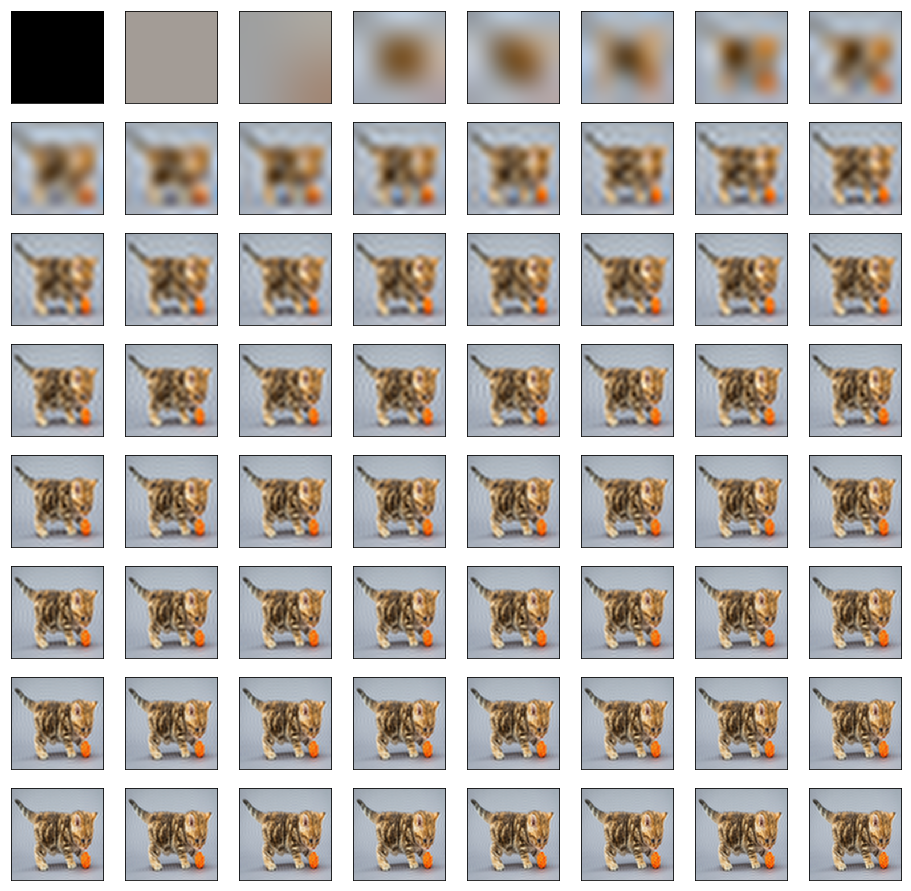

In [9]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(compressed_images[ii])
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

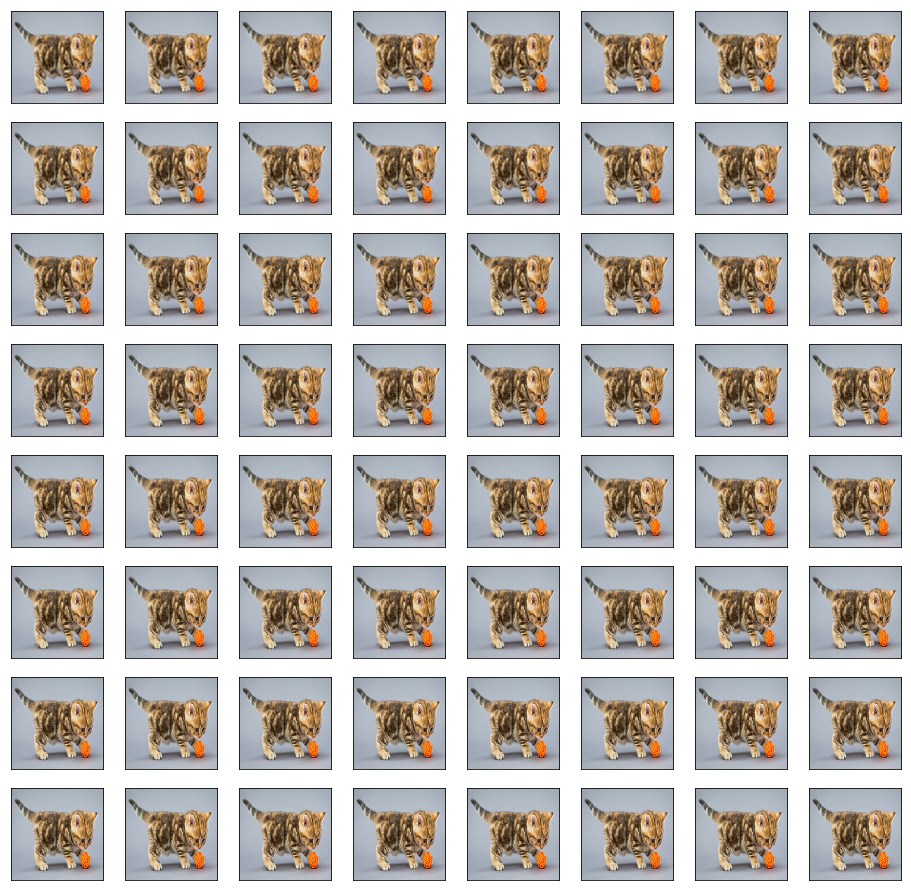

In [10]:
fig = plt.figure(figsize=(16, 16))
for ii in range(64, 128):
    plt.subplot(8, 8, ii - 63)
    plt.imshow(compressed_images[ii])
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

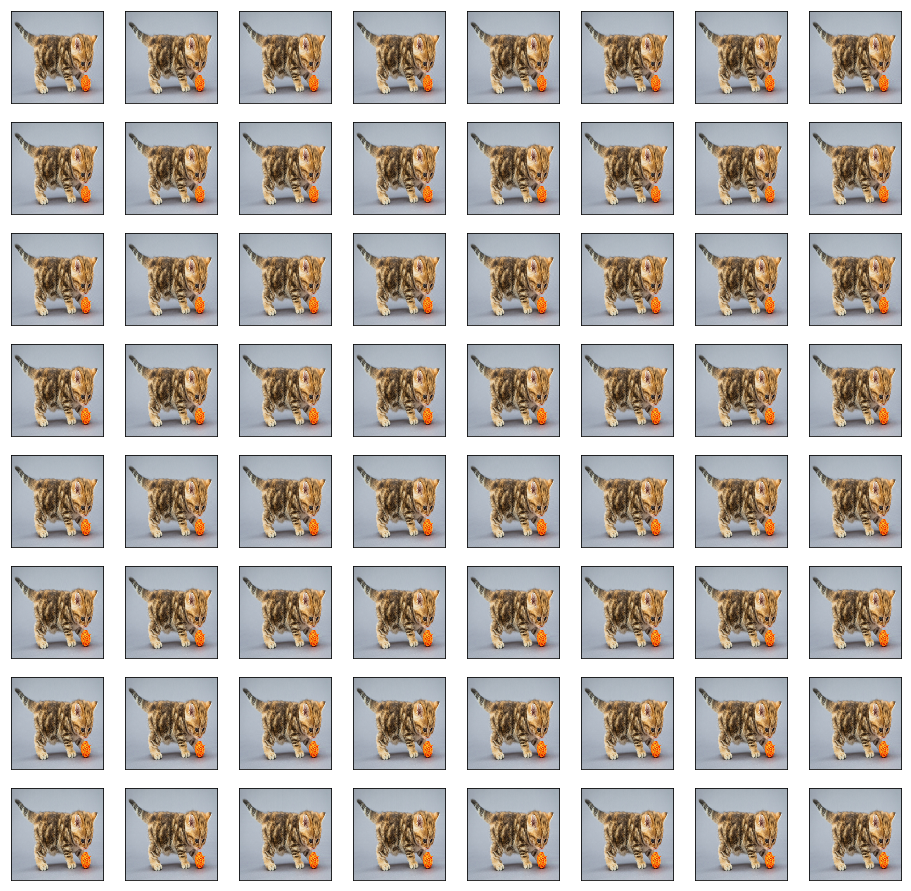

In [11]:
fig = plt.figure(figsize=(16, 16))
for ii in range(128, 192):
    plt.subplot(8, 8, ii - 127)
    plt.imshow(compressed_images[ii])
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

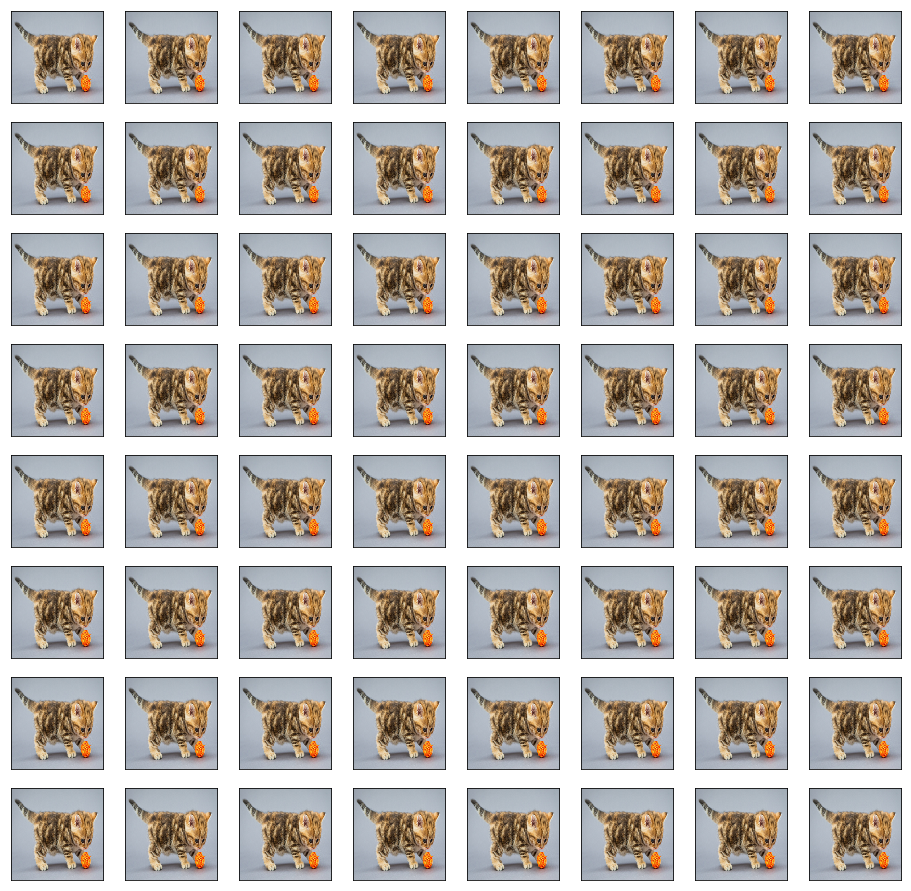

In [12]:
fig = plt.figure(figsize=(16, 16))
for ii in range(192, 256):
    plt.subplot(8, 8, ii - 191)
    plt.imshow(compressed_images[ii])
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);

In [13]:
import os

In [18]:
directory = './colored_images/'

if not os.path.exists(directory):
    os.makedirs(directory)

In [21]:
image_64 = compressed_images[63]
image_64_path = directory + 'slika_out64.jpg' 
image_64.save(image_64_path)

image_128 = compressed_images[127]
image_128_path = directory + 'slika_out128.jpg' 
image_128.save(image_128_path)

image_192 = compressed_images[191]
image_192_path = directory + 'slika_out192.jpg' 
image_192.save(image_192_path)

image_256 = compressed_images[255]
image_256_path = directory + 'slika_out256.jpg' 
image_256.save(image_256_path)

print("Image sizes:\n")
print("Image 64: ", os.path.getsize(image_64_path) / 1000.0, 'KB')
print("Image 128: ", os.path.getsize(image_128_path) / 1000.0, 'KB')
print("Image 192: ", os.path.getsize(image_192_path) / 1000.0, 'KB')
print("Image 256: ", os.path.getsize(image_256_path) / 1000.0, 'KB')

Image sizes:

Image 64:  7.564 KB
Image 128:  8.755 KB
Image 192:  9.432 KB
Image 256:  9.648 KB


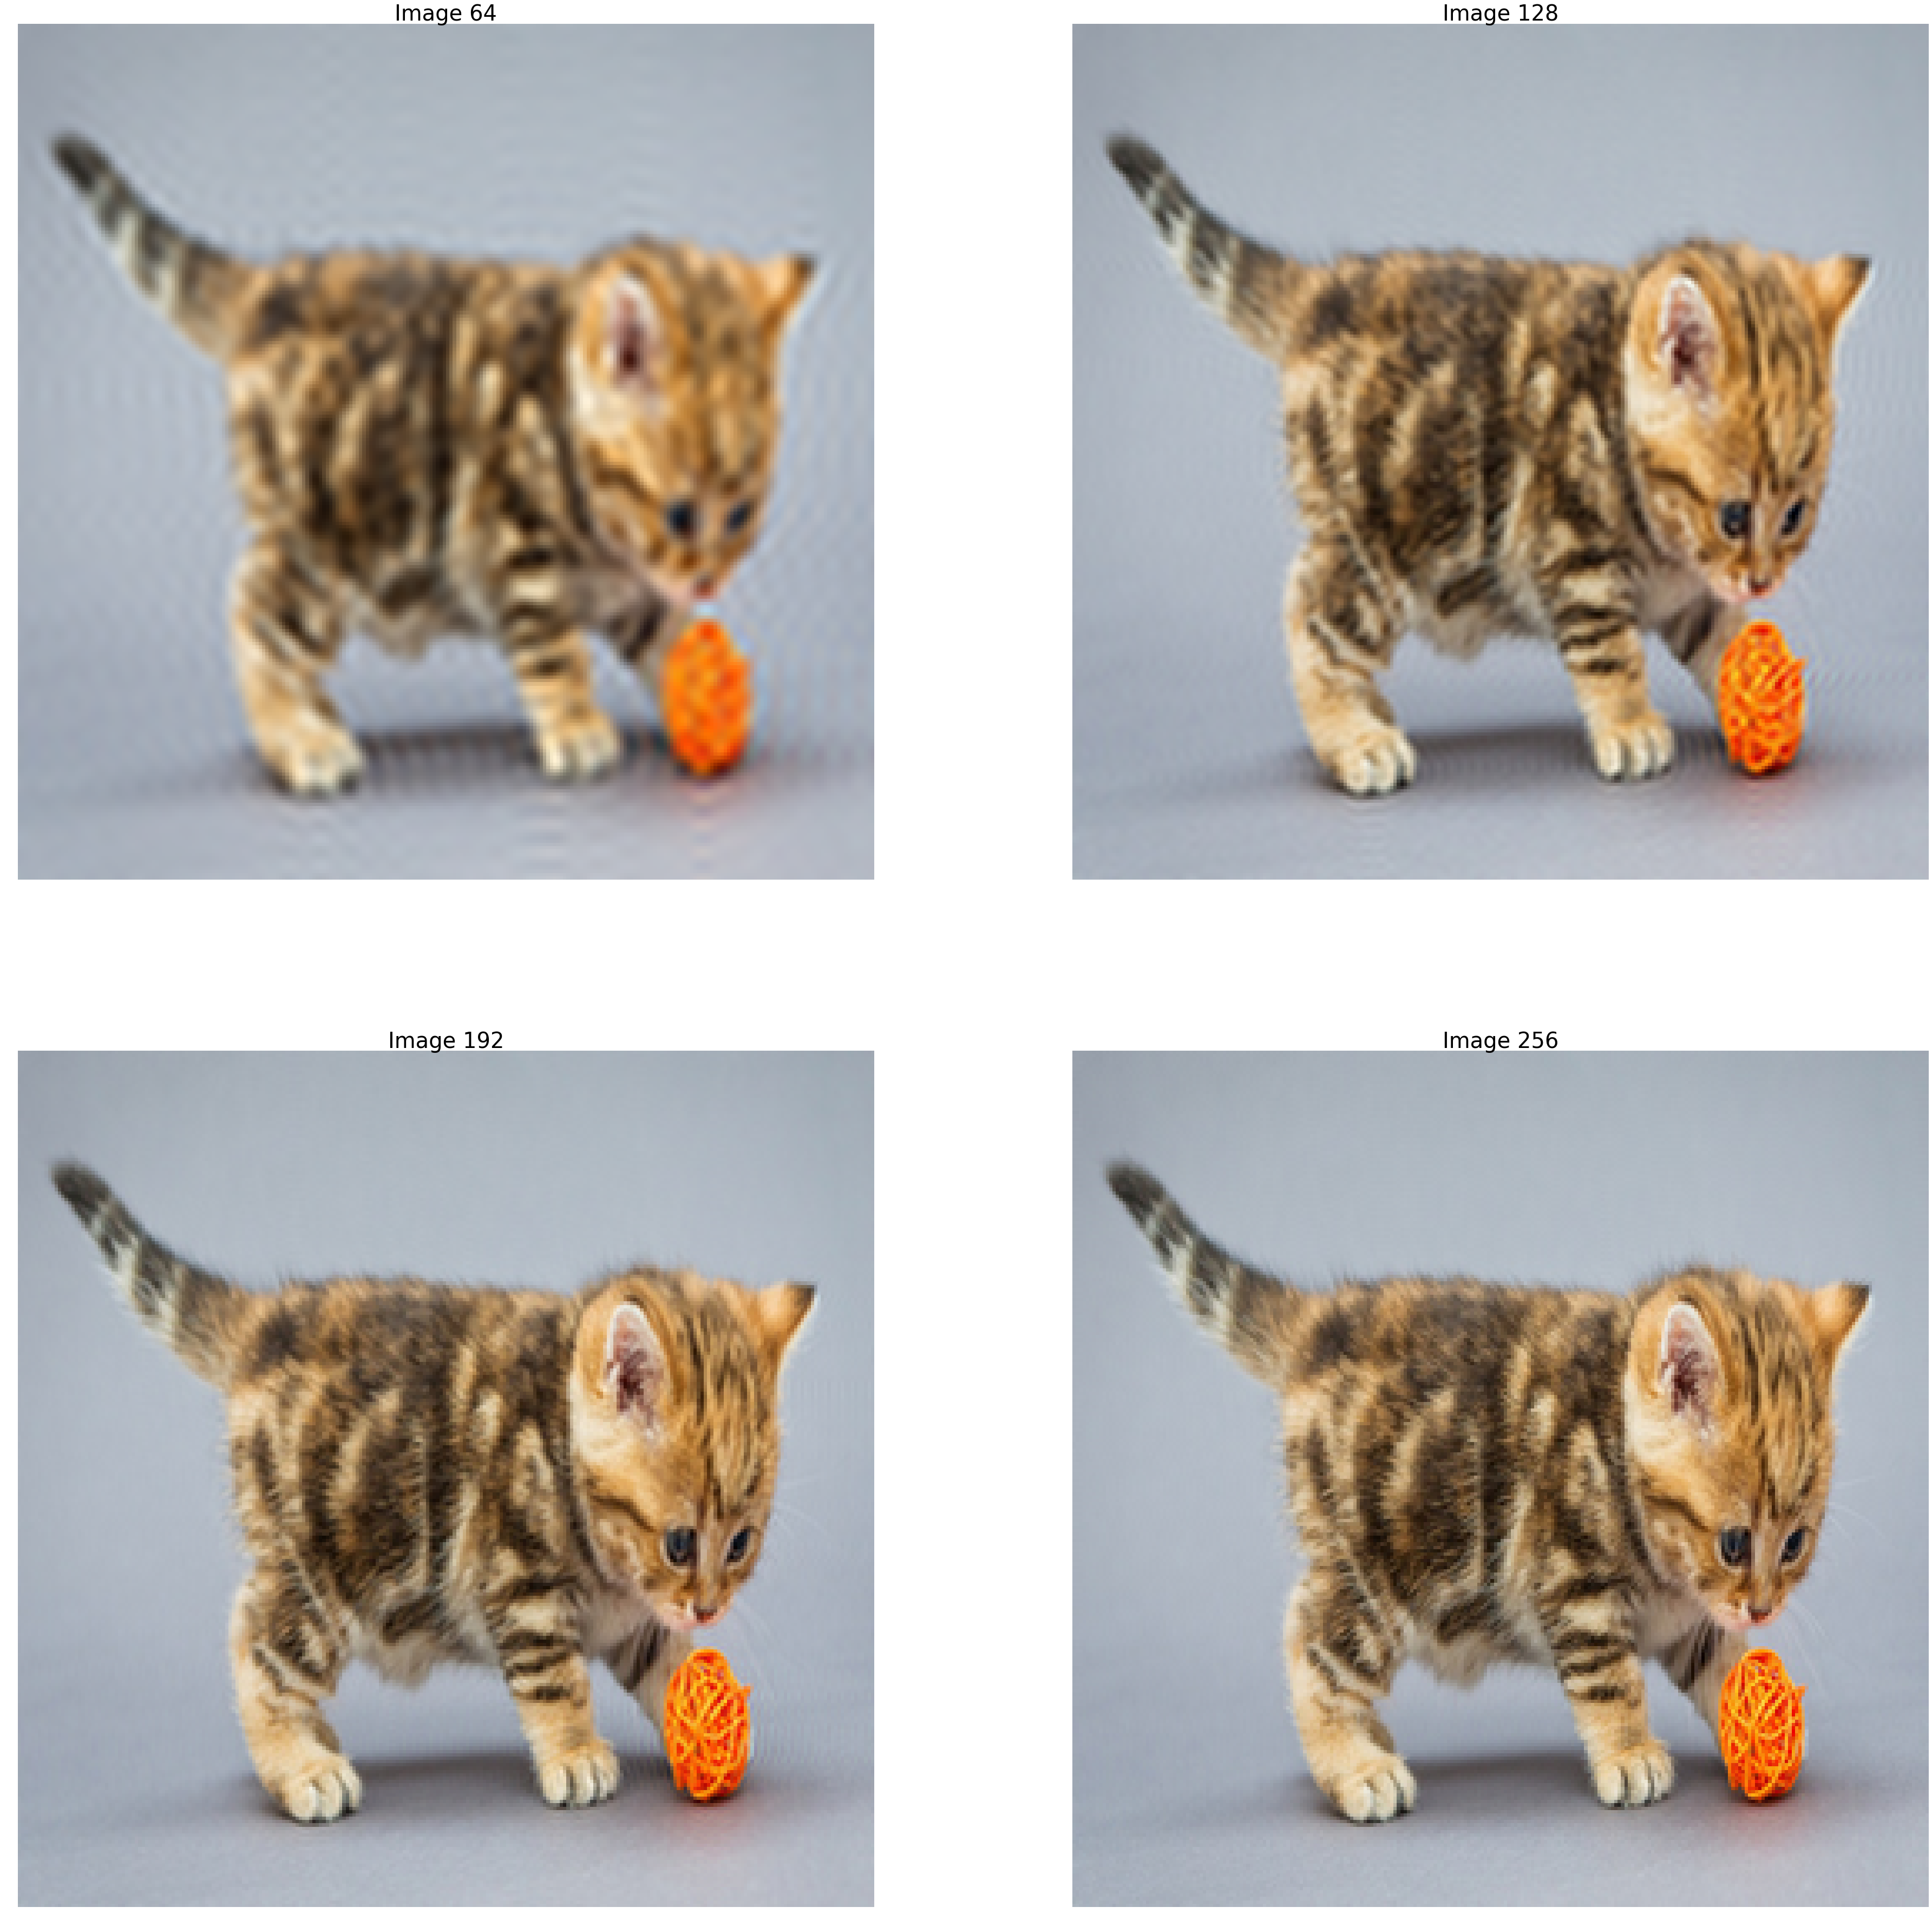

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(64, 64))
ax1.axis('off')
ax1.set_title('Image 64', size=40)
ax1.imshow(image_64)

ax2.axis('off')
ax2.set_title('Image 128', size=40)
ax2.imshow(image_128)

ax3.axis('off')
ax3.set_title('Image 192', size=40)
ax3.imshow(image_192)

ax4.axis('off')
ax4.set_title('Image 256', size=40)
ax4.imshow(image_256);